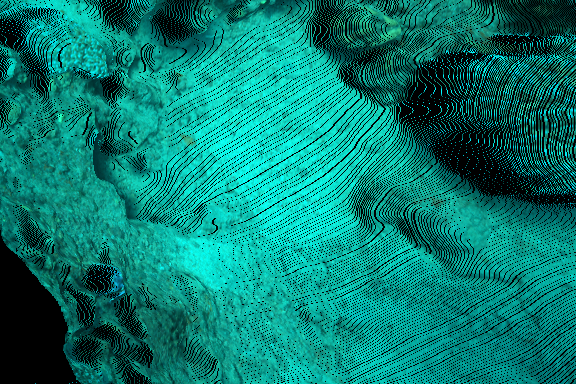

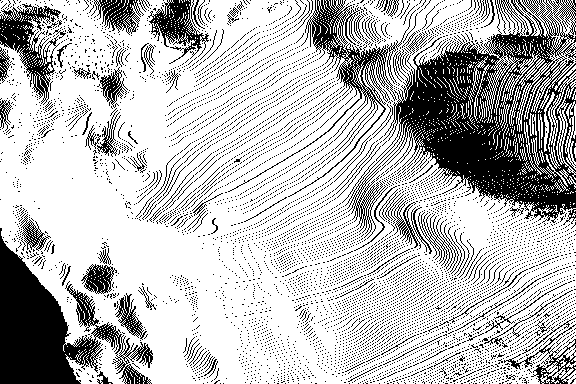

In [6]:
import numpy as np
import cv2 
from PIL import Image

path = "image_completion_test.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

# # pad image to make it square, multiple of 512
# h, w, _ = image.shape
# max_dim = max(h, w)//512 * 512 + 512
# pad_h = max_dim - h
# pad_w = max_dim - w
# image = np.pad(image, ((pad_h//2, pad_h//2), (pad_w//2, pad_w//2), (0, 0)), mode='constant', constant_values=0)


# get the mask of the image where all pixels are black
image_mask = np.all(image != (0,0,0), axis=-1)
image = Image.fromarray((image * 255).astype(np.uint8))
image_mask = Image.fromarray((image_mask * 255).astype(np.uint8))

display(image)
display(image_mask)


# #remove padding
# image = image.crop((pad_w//2, pad_h//2, pad_w//2+w, pad_h//2+h))
# display(image)


In [7]:
from pyinpaint import Inpaint 
inpaint  = Inpaint('image_completion_test.png', 'black_mask_image_test.png')
inpainted_image = inpaint()

display(inpainted_image)

# of pixels to be inpainted are 58974: 100%|██████████|58974/58974


array([[[0.03164434, 0.72587848, 0.65909534],
        [0.01378373, 0.71655991, 0.66220153],
        [0.03319744, 0.71655991, 0.64667057],
        ...,
        [0.03785673, 0.34536983, 0.30110659],
        [0.03164434, 0.32983887, 0.2933411 ],
        [0.06814211, 0.49524367, 0.4913609 ]],

       [[0.0293147 , 0.67384975, 0.61949138],
        [0.01766647, 0.58842945, 0.53018834],
        [0.0277616 , 0.73830326, 0.67152011],
        ...,
        [0.0293147 , 0.3368278 , 0.29722385],
        [0.03319744, 0.36788973, 0.33605126],
        [0.04484566, 0.46418171, 0.45641623]],

       [[0.02154921, 0.63890509, 0.58066397],
        [0.03086779, 0.70801788, 0.63657544],
        [0.01766647, 0.57289849, 0.53018834],
        ...,
        [0.03086779, 0.36556009, 0.33605126],
        [0.03009125, 0.41059989, 0.3834207 ],
        [0.04096292, 0.41370608, 0.41370608]],

       ...,

       [[0.02179014, 0.36903934, 0.34103432],
        [0.02179014, 0.36903934, 0.34103432],
        [0.02179014, 0

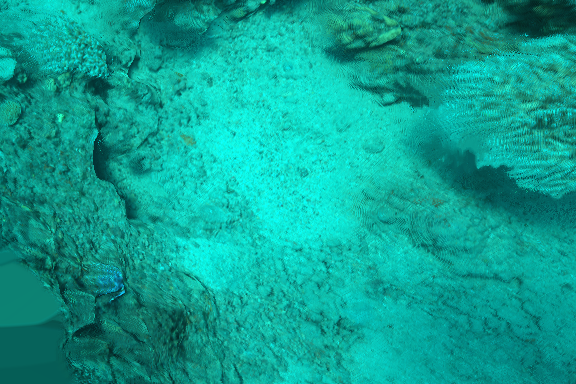

In [8]:
new_image = Image.fromarray((inpainted_image * 255).astype(np.uint8))
display(new_image)

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

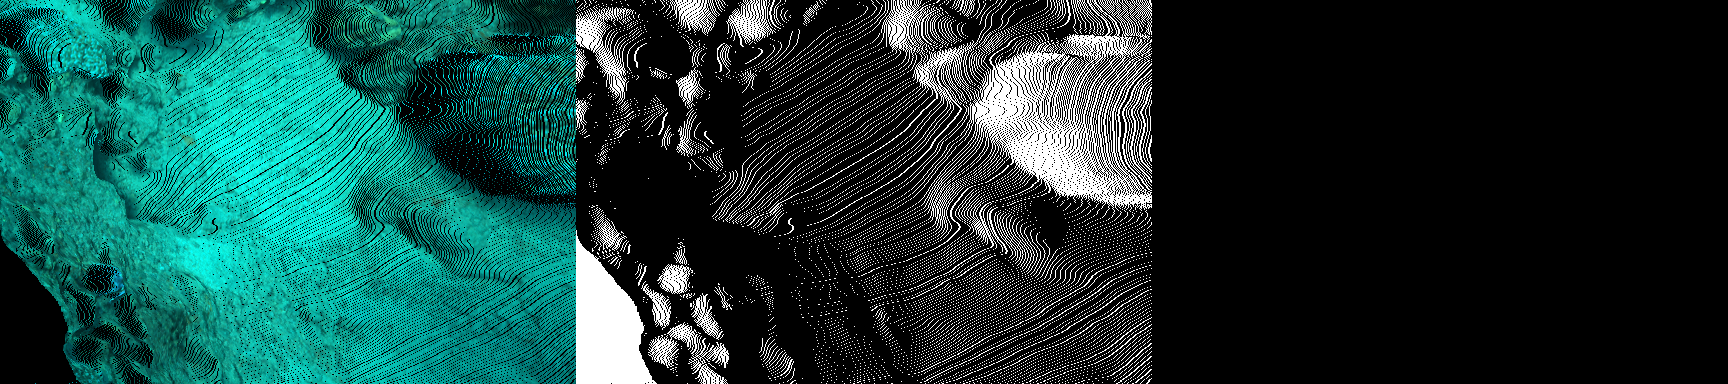

In [6]:
import torch 
#https://github.com/fenglinglwb/MAT/blob/main/
inpainting_model_path = "image_completion_net/Places_512_FullData.pkl"

model = torch.load(inpainting_model_path, map_location='cuda')

def predict(model, inputs):
    #forward pass
    with torch.no_grad():
        outputs = model(**inputs)
        # output is a tensor
        if isinstance(outputs, torch.Tensor):
            predicted = outputs
        else:
         predicted = outputs.predicted
    return predicted


predict